This notebook contains codes to estimate $^{87}Sr/^{86}Sr$ of Grenvillian-aged rocks. In addition to Hydrothermal and Taconic arcs, this geologic province is thought to be a significant source of weathering during the Ordovician.

In [10]:
# Import python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The strontium isotopic ratio at time $t$ can be calculated using this equation:

$$\left(\frac{^{87}Sr}{^{86}Sr}\right)_t=\left(\frac{^{87}Sr}{^{86}Sr}\right)_0 + \frac{^{87}Rb}{^{87}Sr}(e^{\lambda t }-1)$$


By assuming the the isotopic ratio os samples are between $0.700$ to $0.800$ we can approximate that $\frac{^{87}Rb}{^{87}Sr} \approx 2.89$*. Thus, the above equation can be conveniently rewritten as:

$$\left(\frac{^{87}Sr}{^{86}Sr}\right)_t=\left(\frac{^{87}Sr}{^{86}Sr}\right)_0 + 2.89(e^{\lambda t }-1)$$


*see Faure and Mensing (2009) for a more detailed explanation

In [11]:
# Function to calculate 87Sr/86Sr at time t
def Sr_t(Sr_init, time, decay_const=1.39e-11):
    Sr = Sr_init + (2.89 * (np.exp(decay_const*time)-1))
    return Sr

def Sr_t0(Sr_meas, time, decay_const=1.39e-11):
    Sr = Sr_meas - (2.89 * (np.exp(decay_const*time)-1))
    return Sr

In [12]:
Sr_granite_init = 0.7119
Sr_basalt_init = 0.7030

Sr_granite_ordo = Sr_t(Sr_granite_init, 5.5e8)
Sr_basalt_ordo = Sr_t(Sr_basalt_init, 5.5e8)

print('Sr ratio Grenvillian granite =', str(round(Sr_granite_ordo, 5)))
print('Sr ratio Grenvillian basalt =', str(round(Sr_basalt_ordo, 5)))

Sr ratio Grenvillian granite = 0.73408
Sr ratio Grenvillian basalt = 0.72518


Sr isotopes of Grenvillian rocks from Krogh and Hurley (1968)

In [13]:
SrGrenville = pd.read_excel("../Data/Grenville_KroghHurley_1968.xlsx")
SrGrenville.head()

,SampleID,RbSr_XRF,RbSr_ID,Sr86Sr88,SrMeasured,SrCorr,LithoUnit
0,R5138(1)N,0.898,0.916,0.1194,0.7192,0.7192,Burleigh paragneiss
1,R5138(2)N,12.290,12.260,0.1190,0.8935,0.8919,Burleigh paragneiss
2,R5138(3)N,1.890,1.930,0.1187,0.7337,0.7316,Burleigh paragneiss
3,R5138(6)N,6.790,6.790,0.1191,0.8154,0.8142,Burleigh paragneiss
4,R5140(1)S,4.570,4.620,0.1195,0.7746,0.7748,Burleigh paragneiss


In [14]:
SrGrenville['SrCorr'].describe()

count    64.000000
mean      0.770022
std       0.061153
min       0.707600
25%       0.726400
50%       0.744750
75%       0.794925
max       0.974300
Name: SrCorr, dtype: float64

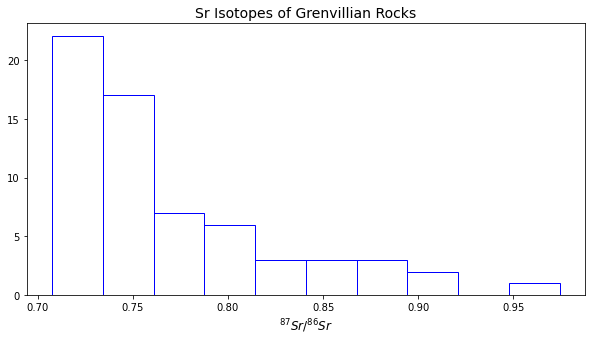

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
SrGrenville['SrCorr'].hist(ax=ax, fc='none', ec='blue')
ax.grid(False)
ax.set_title('Sr Isotopes of Grenvillian Rocks', fontsize=14)
ax.set_xlabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
plt.show()

C:\Users\datua\Anaconda3\envs\pywork\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


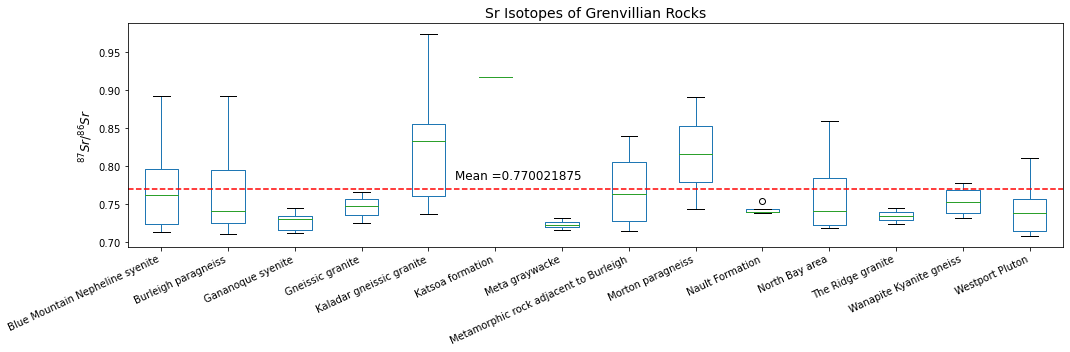

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
SrGrenville.boxplot(column=['SrCorr'], by=['LithoUnit'], ax=ax)

ax.axhline(y=SrGrenville['SrCorr'].mean(), c='red', ls='--')
ax.text(0.35,0.3,'Mean ='+str(SrGrenville['SrCorr'].mean()), transform=ax.transAxes, fontsize=12)
xt = ax.get_xticklabels()
ax.set_xticklabels(xt,rotation=25, ha='right')
ax.set_xlabel('')
ax.set_ylabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
ax.set_title('Sr Isotopes of Grenvillian Rocks', fontsize=14)
fig.suptitle('')
ax.grid(False)
plt.tight_layout()
plt.savefig("../Figure/Grenville_Sr.png")
plt.show()

In [17]:
SrGrenville['Ordo'] = Sr_t0(SrGrenville['SrCorr'], 465e6)
SrGrenville['Ordo'].describe()

count    64.000000
mean      0.751282
std       0.061153
min       0.688860
25%       0.707660
50%       0.726010
75%       0.776185
max       0.955560
Name: Ordo, dtype: float64

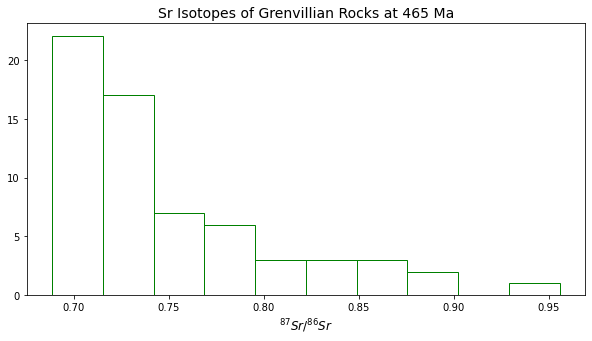

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
SrGrenville['Ordo'].hist(ax=ax, fc='none', ec='green')
ax.grid(False)
ax.set_title('Sr Isotopes of Grenvillian Rocks at 465 Ma', fontsize=14)
ax.set_xlabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
plt.show()

C:\Users\datua\Anaconda3\envs\pywork\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


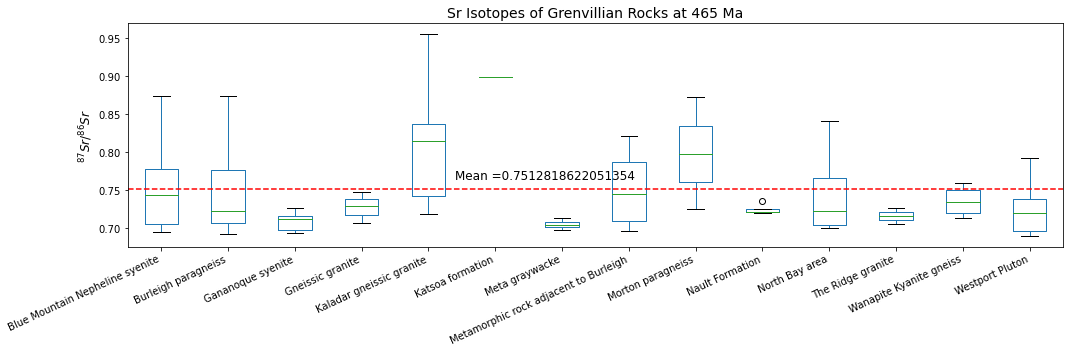

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
SrGrenville.boxplot(column=['Ordo'], by=['LithoUnit'], ax=ax)

ax.axhline(y=SrGrenville['Ordo'].mean(), c='red', ls='--')
ax.text(0.35,0.3,'Mean ='+str(SrGrenville['Ordo'].mean()), transform=ax.transAxes, fontsize=12)
xt = ax.get_xticklabels()
ax.set_xticklabels(xt,rotation=25, ha='right')
ax.set_xlabel('')
ax.set_ylabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
ax.set_title('Sr Isotopes of Grenvillian Rocks at 465 Ma', fontsize=14)
fig.suptitle('')
ax.grid(False)
plt.tight_layout()
plt.savefig("../Figure/Grenville_Sr_Ordo.png")
plt.show()

Sr isotopes or river draining the Canadian Shield from Millot et al (2002)

In [21]:
SrRiver = pd.read_excel("../Data/RiverSr_CanadianShield_Millot_etal_2002.xlsx")
SrRiver.head(15)

,Localities,Sample #,River name,Date of sampling,Water stage,SrRatio,Rb,Sr,pH,Na,...,Σ+,Cl,Clatm,NO3,SO4,HCO3,Σ−,NICB,DOC,H4SiO4
0,Slave Province,CAN96-30,Tibbitt,1996-08-01,M,0.741165,2.06,23.44,7.40,72.0,...,595,47.0,15.0,–,34.0,426,541,9,–,6.8
1,Slave Province,CAN96-31,Yellowknife,1996-08-01,M,0.742449,1.92,20.25,7.08,62.0,...,409,35.0,15.0,1.42,25.0,253,339,17,5.4,4.3
2,Slave Province,CAN99-84,Wecho,1999-06-01,H,0.744591,2.37,21.11,6.71,74.8,...,423,44.3,15.0,0.46,12.8,225,296,30,–,6
3,Slave Province,CAN99-85,Emile,1999-06-01,H,0.748742,1.74,15.24,6.81,55.8,...,491,19.7,15.0,1.32,22.3,350,416,15,–,2.2
4,Slave Province,CAN99-86,Wopmay,1999-06-01,H,0.751712,1.51,9.23,6.84,34.9,...,433,14.1,14.1,0.91,21.2,330,387,11,–,0.8
5,Slave Province,CAN99-87,Indin,1999-06-01,H,0.741174,1.77,10.46,6.67,32.0,...,217,13.5,13.5,1.07,14.5,100,144,34,–,1.1
6,Slave Province,CAN99-88,Mc Crea,1999-06-01,H,0.749644,1.88,13.35,6.73,54.0,...,304,34.7,15.0,–,24.8,180,264,13,–,–
7,Slave Province,CAN99-89,Beaulieu,1999-06-01,H,0.735792,1.86,23.15,6.74,97.4,...,549,78.1,15.0,–,27.7,299,432,21,–,4.6
8,Slave Province,CAN99-90,Yellowknife,1999-06-01,H,0.742001,1.86,19.71,6.80,73.6,...,439,46.5,15.0,0.55,25.0,310,407,7,–,2.7
9,Slave Province,CAN99-91,Cameroon,1999-06-01,H,0.741921,2.43,26.77,6.97,86.4,...,669,57.3,15.0,0.18,38.9,470,605,10,–,0.2


Estimate Sr Ratio during the Ordovician

In [79]:
SrRiver['Ordo'] = Sr_t0(SrRiver['SrRatio'], 465e6)

In [80]:
SrRiverArchean = SrRiver[SrRiver['Localities']=='Slave Province']
SrRiverArchean['SrRatio'].describe()

count    13.000000
mean      0.742624
std       0.005154
min       0.734562
25%       0.741165
50%       0.742001
75%       0.744591
max       0.751712
Name: SrRatio, dtype: float64

In [81]:
SrRiverArchean['Ordo'].describe()

count    13.000000
mean      0.723884
std       0.005154
min       0.715822
25%       0.722425
50%       0.723261
75%       0.725851
max       0.732972
Name: Ordo, dtype: float64

In [82]:
SrRiverGrenville = SrRiver[SrRiver['Localities']=='Grenville Province']
SrRiverGrenville['SrRatio'].describe()

count    15.000000
mean      0.712320
std       0.002041
min       0.709821
25%       0.710581
50%       0.712213
75%       0.713544
max       0.715503
Name: SrRatio, dtype: float64

In [83]:
SrRiverGrenville['Ordo'].describe()

count    15.000000
mean      0.693580
std       0.002041
min       0.691081
25%       0.691840
50%       0.693473
75%       0.694804
max       0.696763
Name: Ordo, dtype: float64

C:\Users\datua\Anaconda3\envs\pywork\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\datua\Anaconda3\envs\pywork\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


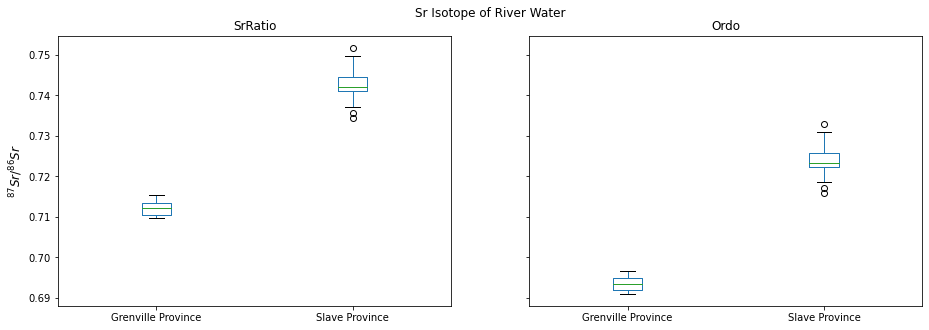

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

SrRiver.boxplot(column=['SrRatio'], by=['Localities'], ax=ax1)


ax1.set_xlabel('')
ax1.set_ylabel(r'$^{87}Sr/^{86}Sr$', fontsize=12)
ax1.grid(False)

SrRiver.boxplot(column=['Ordo'], by=['Localities'], ax=ax2)


ax2.set_xlabel('')
ax2.grid(False)

fig.suptitle('Sr Isotope of River Water')

plt.show()